In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.14.0
Num GPUs Available:  0


In [9]:
np.random.seed(7)
max_vocab =5000
epochs = 5
batch_size= 16
max_words = 400
embedding_vector_length = 32

In [11]:
(x_train , y_train) , (x_test , y_test) = imdb.load_data(num_words=max_vocab)
x_train  = pad_sequences(x_train , maxlen=max_words)
x_test = pad_sequences(x_test , maxlen=max_words)

print((x_train[0].shape))

(400,)


In [14]:
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(max_vocab , embedding_vector_length , input_length=max_words))
model.add(keras.layers.LSTM(20))
model.add(keras.layers.Dense(1 , activation='sigmoid'))

model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics =['accuracy']
)

history = model.fit(x_train , y_train , epochs=epochs , batch_size=batch_size , validation_data=(x_test , y_test))

Epoch 1/5
1563/1563 [==============================] - 142s 90ms/step - loss: 0.3932 - accuracy: 0.8256 - val_loss: 0.3127 - val_accuracy: 0.8754
Epoch 2/5
1563/1563 [==============================] - 153s 98ms/step - loss: 0.3039 - accuracy: 0.8733 - val_loss: 0.3437 - val_accuracy: 0.8594
Epoch 3/5
1563/1563 [==============================] - 168s 107ms/step - loss: 0.2426 - accuracy: 0.9054 - val_loss: 0.3276 - val_accuracy: 0.8669
Epoch 4/5
1563/1563 [==============================] - 158s 101ms/step - loss: 0.2037 - accuracy: 0.9227 - val_loss: 0.3024 - val_accuracy: 0.8754
Epoch 5/5
1563/1563 [==============================] - 159s 101ms/step - loss: 0.1889 - accuracy: 0.9270 - val_loss: 0.3204 - val_accuracy: 0.8690


In [15]:
score = model.evaluate(x_test , y_test)

782/782 [==============================] - 19s 25ms/step - loss: 0.3204 - accuracy: 0.8690


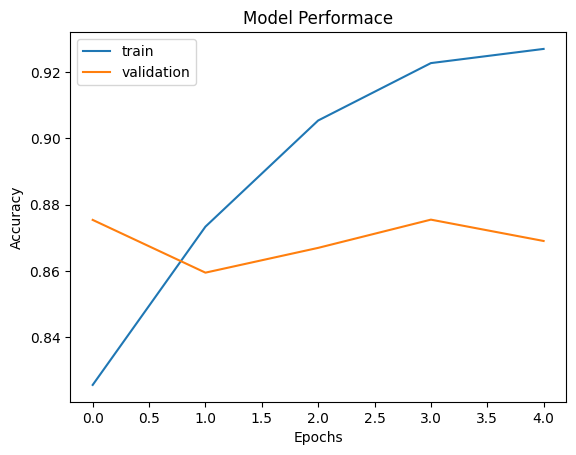

In [17]:
#plot
plt.plot(history.history['accuracy'] , label='train')
plt.plot(history.history['val_accuracy'] , label='validation')
plt.title('Model Performace')
plt.legend(loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()